In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('LCR.csv')
f=df.freq.values
v1=df.v1.values
v2=df.v2.values

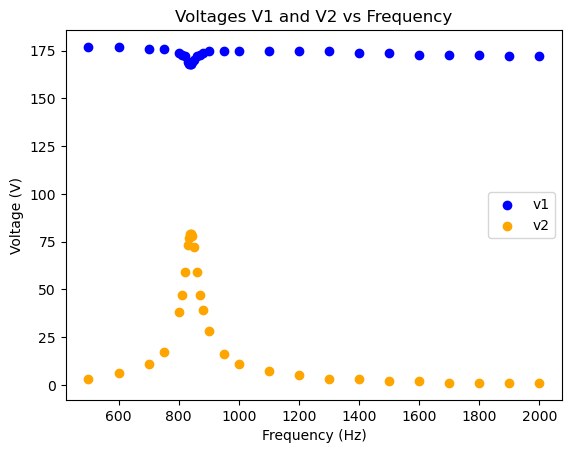

In [3]:
import matplotlib.pyplot as plt
plt.scatter(f,v1, label='v1', color='blue')
plt.scatter(f,v2, label='v2', color='orange')
#plt.xscale('log')
plt.title('Voltages V1 and V2 vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.savefig('Question 5 Voltages V1 and V2 vs Frequency')

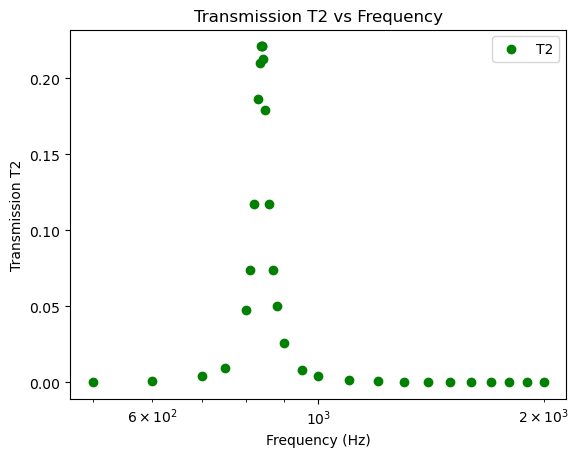

In [4]:
T2=(v2/v1)**2
plt.scatter(f,T2, label='T2', color='green')
plt.xscale('log')
plt.title('Transmission T2 vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission T2')
plt.legend()
plt.savefig('Question 5 Transmission T2 vs Frequency')

In [5]:
def RCfit2(f,a,b,c):
    return 1/((1+c)**2+(b/a)**2*((f/a)**2+(a/f)**2-2))

In [6]:
dT2=(2/(12**0.5))*(v2**4/v1**6+v2**2/v1**4)**0.5

In [7]:
p0=850,1335,0.948
popt,pcov=curve_fit(RCfit2, f, T2, p0, sigma=dT2)
print('a: ' +str(popt[0]) + 'b: ' + str(popt[1]) + ' c: ' + str(popt[2]))
print('Errors(a,b,c): '+ str(np.sqrt(pcov.diagonal())))
print(popt+1.959964*np.sqrt(pcov.diagonal()))
print(popt-1.959964*np.sqrt(pcov.diagonal()))

a: 839.6537972937156b: 36029.767785424 c: 1.1174770959904108
Errors(a,b,c): [3.48139028e-01 5.24318092e+02 1.41724356e-02]
[8.40336137e+02 3.70574124e+04 1.14525456e+00]
[8.38971457e+02 3.50021232e+04 1.08969963e+00]


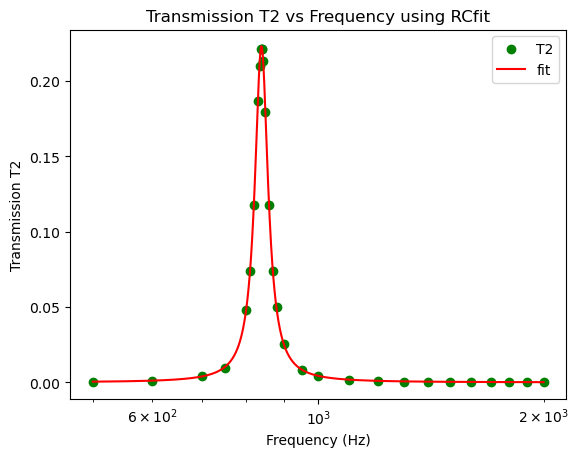

In [8]:
newx=np.arange(500,2000,1)
yfit=1/((1+popt[2])**2+(popt[1]/popt[0])**2*((newx/popt[0])**2+(popt[0]/newx)**2-2))
plt.scatter(f,T2, label='T2', color='green')
plt.xscale('log')
plt.title('Transmission T2 vs Frequency using RCfit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission T2')
plt.plot(newx,yfit,'r',label='fit')
plt.xscale('log')
plt.legend()
plt.savefig('Question 5 Transmission T2 vs Frequency using RCfit')

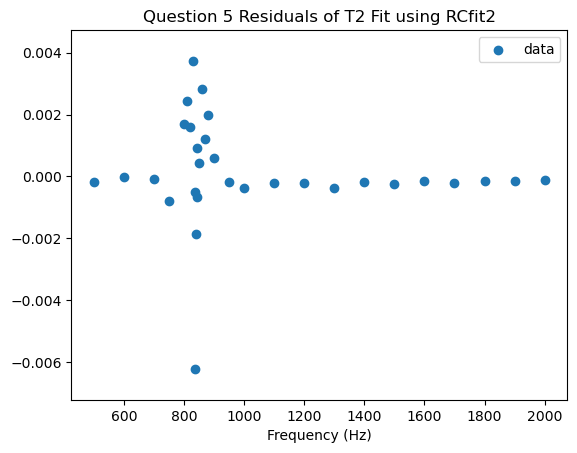

In [9]:
fitatx=RCfit2(f,*popt)
res=T2-fitatx
plt.scatter(f,res,marker='o',label='data')
#plt.xscale('log')
plt.ylim(min(res)-0.001,max(res)+0.001)
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.title('Question 5 Residuals of T2 Fit using RCfit2')
plt.savefig('Question 5 Residuals of T2 Fit using RCfit2')